## In 1965, Gordon Moore stated that the number of transistors in a dense integrated circuit (IC) doubles about every two years (Moore's Law)

In [1]:
import pandas as pd
import re
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import cufflinks as cf
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
import bar_chart_race as bcr
import pickle
from joblib import dump, load
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from IPython.display import Image
from matplotlib import animation
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D 
from nltk.corpus import stopwords
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import svm
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from tensorflow.python.client import device_lib 
from tqdm.notebook import tqdm, trange
import datetime
import h5py
import json
import lightgbm as lgb
import nltk
import os
import plotly.io as pio
import pprint as pp
import requests
import sklearn
import statsmodels.formula.api as sm
import sys 
import tensorflow as tf
import tensorflow_hub as hub  
import time
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
cf.go_offline()

In [3]:
def left(s, amount):
    return s[:amount]

def right(s, amount):
    return s[-amount:]

def mid(s, offset, amount):
    return s[offset:offset+amount]

In [4]:
df = pd.read_html('https://en.wikipedia.org/wiki/Transistor_count')
df2 = copy.deepcopy(df)
df2 = pd.DataFrame(df2[3])
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace(" ","")
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace(" ","")
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace("+","")
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace(" ","")
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace("?","nan")
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace("?","nan")
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace("NaN","nan")
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace("\[\d+\]", '')
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace("\[\d+\]", '')
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace("\[\d+\]", '')
df2['Date ofintroduction'] = df2['Date ofintroduction'].str.replace("\[\d+\]", '')
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace("mm2","")
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace("nm","")
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace("[^0-9.nan]", '')
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace("[^0-9.nan]", '')
df2['Date ofintroduction'] = df2['Date ofintroduction'].str.replace("[^0-9.nan]", '')
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace("\(.*?\)", '')
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace(",", '')
df2['MOS transistor count'] = df2['MOS transistor count'].str.replace("[\D+]", '')
for i in range(len(df2)):
    df2.loc[i, 'Date ofintroduction'] = left(df2.loc[i, 'Date ofintroduction'], 4)
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\ProgramData\Anac

,Processor,MOS transistor count,Date ofintroduction,Designer,MOS process(nm),Area (mm2)
0,"MP944 (20-bit, 6-chip, 28 chips total)",74442,1970,Garrett AiResearch,nan,nan
1,"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,10000,12
2,"TMX 1795 (?-bit, 24-pin)",3078,1971,Texas Instruments,nan,30
3,"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,10000,14
4,"NEC μCOM-4 (4-bit, 42-pin)",2500,1973,NEC,7500,nan
...,...,...,...,...,...,...
193,Apple A15,15000000000,2021,Apple,5,107.68
194,"AMD Ryzen 7 5800H (64-bit, SIMD, caches, I/O a...",10700000000,2021,AMD,7,180
195,"Apple M1 Pro (10-core, 64-bit)",33700000000,2021,Apple,5,245
196,"Apple M1 Max (10-core, 64-bit)",57000000000,2021,Apple,5,432


In [5]:
df2.set_index('Date ofintroduction', inplace=True)
df2.reset_index(inplace=True)
df2

,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
0,1970,"MP944 (20-bit, 6-chip, 28 chips total)",74442,Garrett AiResearch,nan,nan
1,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
2,1971,"TMX 1795 (?-bit, 24-pin)",3078,Texas Instruments,nan,30
3,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
4,1973,"NEC μCOM-4 (4-bit, 42-pin)",2500,NEC,7500,nan
...,...,...,...,...,...,...
193,2021,Apple A15,15000000000,Apple,5,107.68
194,2021,"AMD Ryzen 7 5800H (64-bit, SIMD, caches, I/O a...",10700000000,AMD,7,180
195,2021,"Apple M1 Pro (10-core, 64-bit)",33700000000,Apple,5,245
196,2021,"Apple M1 Max (10-core, 64-bit)",57000000000,Apple,5,432


In [6]:
df2.isna().sum()

Date ofintroduction     0
Processor               0
MOS transistor count    1
Designer                0
MOS process(nm)         0
Area (mm2)              1
dtype: int64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date ofintroduction   198 non-null    object
 1   Processor             198 non-null    object
 2   MOS transistor count  197 non-null    object
 3   Designer              198 non-null    object
 4   MOS process(nm)       198 non-null    object
 5   Area (mm2)            197 non-null    object
dtypes: object(6)
memory usage: 9.4+ KB


In [8]:
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace("(\D+)", '')
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace("(\D+)", '')
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace("(\s)", '')
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace("(\s)", '')
df2['Area (mm2)'] = df2['Area (mm2)'].str.replace(" ", '')
df2['MOS process(nm)'] = df2['MOS process(nm)'].str.replace(" ", '')
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
0,1970,"MP944 (20-bit, 6-chip, 28 chips total)",74442,Garrett AiResearch,,
1,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
2,1971,"TMX 1795 (?-bit, 24-pin)",3078,Texas Instruments,,30
3,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
4,1973,"NEC μCOM-4 (4-bit, 42-pin)",2500,NEC,7500,
...,...,...,...,...,...,...
193,2021,Apple A15,15000000000,Apple,5,10768
194,2021,"AMD Ryzen 7 5800H (64-bit, SIMD, caches, I/O a...",10700000000,AMD,7,180
195,2021,"Apple M1 Pro (10-core, 64-bit)",33700000000,Apple,5,245
196,2021,"Apple M1 Max (10-core, 64-bit)",57000000000,Apple,5,432


In [9]:
for i in range(len(df2)):
    if df2.loc[i, 'Area (mm2)'] == '':
        df2.loc[i, 'Area (mm2)'] = np.nan
    elif df2.loc[i, 'Area (mm2)'] == np.nan:
        df2.loc[i, 'Area (mm2)'] = 'nan'
    if df2.loc[i, 'MOS process(nm)'] == '':
        df2.loc[i, 'MOS process(nm)'] = np.nan
    elif df2.loc[i, 'MOS process(nm)'] == np.nan:
        df2.loc[i, 'MOS process(nm)'] = 'nan'

df2

,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
0,1970,"MP944 (20-bit, 6-chip, 28 chips total)",74442,Garrett AiResearch,NaN,NaN
1,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
2,1971,"TMX 1795 (?-bit, 24-pin)",3078,Texas Instruments,NaN,30
3,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
4,1973,"NEC μCOM-4 (4-bit, 42-pin)",2500,NEC,7500,NaN
...,...,...,...,...,...,...
193,2021,Apple A15,15000000000,Apple,5,10768
194,2021,"AMD Ryzen 7 5800H (64-bit, SIMD, caches, I/O a...",10700000000,AMD,7,180
195,2021,"Apple M1 Pro (10-core, 64-bit)",33700000000,Apple,5,245
196,2021,"Apple M1 Max (10-core, 64-bit)",57000000000,Apple,5,432


In [10]:
df2.isna().sum()

Date ofintroduction      0
Processor                0
MOS transistor count     1
Designer                 0
MOS process(nm)         14
Area (mm2)              32
dtype: int64

In [11]:
pd.set_option('Display.max_rows', 200)

In [12]:
df2.dropna(subset=['MOS transistor count'], inplace=True)
df2

,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
0,1970,"MP944 (20-bit, 6-chip, 28 chips total)",74442,Garrett AiResearch,NaN,NaN
1,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
2,1971,"TMX 1795 (?-bit, 24-pin)",3078,Texas Instruments,NaN,30
3,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
4,1973,"NEC μCOM-4 (4-bit, 42-pin)",2500,NEC,7500,NaN
5,1973,Toshiba TLCS-12 (12-bit),11000,Toshiba,6000,32
6,1974,"Intel 4040 (4-bit, 16-pin)",3000,Intel,10000,12
7,1974,"Motorola 6800 (8-bit, 40-pin)",4100,Motorola,6000,16
8,1974,"Intel 8080 (8-bit, 40-pin)",6000,Intel,6000,20
9,1974,"TMS 1000 (4-bit, 28-pin)",8000,Texas Instruments,8000,11


In [13]:
df2.isna().sum()

Date ofintroduction      0
Processor                0
MOS transistor count     0
Designer                 0
MOS process(nm)         14
Area (mm2)              32
dtype: int64

In [14]:
df2.dropna(subset=['Area (mm2)'], inplace=True)
df2

,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
1,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
2,1971,"TMX 1795 (?-bit, 24-pin)",3078,Texas Instruments,NaN,30
3,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
5,1973,Toshiba TLCS-12 (12-bit),11000,Toshiba,6000,32
6,1974,"Intel 4040 (4-bit, 16-pin)",3000,Intel,10000,12
7,1974,"Motorola 6800 (8-bit, 40-pin)",4100,Motorola,6000,16
8,1974,"Intel 8080 (8-bit, 40-pin)",6000,Intel,6000,20
9,1974,"TMS 1000 (4-bit, 28-pin)",8000,Texas Instruments,8000,11
10,1975,"MOS Technology 6502 (8-bit, 40-pin)",4528,MOS Technology,8000,21
13,1976,"RCA 1802 (8-bit, 40-pin)",5000,RCA,5000,27


In [15]:
df2.isna().sum()

Date ofintroduction     0
Processor               0
MOS transistor count    0
Designer                0
MOS process(nm)         2
Area (mm2)              0
dtype: int64

In [16]:
df2.dropna(subset=['MOS process(nm)'], inplace=True)
df2

,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
1,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
3,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
5,1973,Toshiba TLCS-12 (12-bit),11000,Toshiba,6000,32
6,1974,"Intel 4040 (4-bit, 16-pin)",3000,Intel,10000,12
7,1974,"Motorola 6800 (8-bit, 40-pin)",4100,Motorola,6000,16
8,1974,"Intel 8080 (8-bit, 40-pin)",6000,Intel,6000,20
9,1974,"TMS 1000 (4-bit, 28-pin)",8000,Texas Instruments,8000,11
10,1975,"MOS Technology 6502 (8-bit, 40-pin)",4528,MOS Technology,8000,21
13,1976,"RCA 1802 (8-bit, 40-pin)",5000,RCA,5000,27
14,1976,"Zilog Z80 (8-bit, 4-bit ALU, 40-pin)",8500,Zilog,4000,18


In [17]:
df2.isna().sum()

Date ofintroduction     0
Processor               0
MOS transistor count    0
Designer                0
MOS process(nm)         0
Area (mm2)              0
dtype: int64

In [18]:
df2.reset_index(inplace=True, drop=True)
df2

,Date ofintroduction,Processor,MOS transistor count,Designer,MOS process(nm),Area (mm2)
0,1971,"Intel 4004 (4-bit, 16-pin)",2250,Intel,10000,12
1,1972,"Intel 8008 (8-bit, 18-pin)",3500,Intel,10000,14
2,1973,Toshiba TLCS-12 (12-bit),11000,Toshiba,6000,32
3,1974,"Intel 4040 (4-bit, 16-pin)",3000,Intel,10000,12
4,1974,"Motorola 6800 (8-bit, 40-pin)",4100,Motorola,6000,16
5,1974,"Intel 8080 (8-bit, 40-pin)",6000,Intel,6000,20
6,1974,"TMS 1000 (4-bit, 28-pin)",8000,Texas Instruments,8000,11
7,1975,"MOS Technology 6502 (8-bit, 40-pin)",4528,MOS Technology,8000,21
8,1976,"RCA 1802 (8-bit, 40-pin)",5000,RCA,5000,27
9,1976,"Zilog Z80 (8-bit, 4-bit ALU, 40-pin)",8500,Zilog,4000,18


In [19]:
df2.drop(['Processor', 'Designer'], axis=1, inplace=True)
df2

,Date ofintroduction,MOS transistor count,MOS process(nm),Area (mm2)
0,1971,2250,10000,12
1,1972,3500,10000,14
2,1973,11000,6000,32
3,1974,3000,10000,12
4,1974,4100,6000,16
5,1974,6000,6000,20
6,1974,8000,8000,11
7,1975,4528,8000,21
8,1976,5000,5000,27
9,1976,8500,4000,18


In [20]:
df2 = df2.dropna()
df2.isna().sum()
df2

,Date ofintroduction,MOS transistor count,MOS process(nm),Area (mm2)
0,1971,2250,10000,12
1,1972,3500,10000,14
2,1973,11000,6000,32
3,1974,3000,10000,12
4,1974,4100,6000,16
5,1974,6000,6000,20
6,1974,8000,8000,11
7,1975,4528,8000,21
8,1976,5000,5000,27
9,1976,8500,4000,18


In [21]:
df2.set_index('Date ofintroduction', inplace=True)

In [22]:
df2.iplot()

In [23]:
df2.iplot(kind='surface')

In [24]:
df2.reset_index(inplace=True)

In [25]:
df2

,Date ofintroduction,MOS transistor count,MOS process(nm),Area (mm2)
0,1971,2250,10000,12
1,1972,3500,10000,14
2,1973,11000,6000,32
3,1974,3000,10000,12
4,1974,4100,6000,16
5,1974,6000,6000,20
6,1974,8000,8000,11
7,1975,4528,8000,21
8,1976,5000,5000,27
9,1976,8500,4000,18


In [26]:
df2['MOS transistor count'] = pd.to_numeric(df2['MOS transistor count'], downcast="integer")
df2['MOS process(nm)'] = pd.to_numeric(df2['MOS process(nm)'], downcast="integer")
df2['Area (mm2)'] = pd.to_numeric(df2['Area (mm2)'], downcast="integer")
df2

,Date ofintroduction,MOS transistor count,MOS process(nm),Area (mm2)
0,1971,2250,10000,12
1,1972,3500,10000,14
2,1973,11000,6000,32
3,1974,3000,10000,12
4,1974,4100,6000,16
5,1974,6000,6000,20
6,1974,8000,8000,11
7,1975,4528,8000,21
8,1976,5000,5000,27
9,1976,8500,4000,18


In [27]:
df2.iplot(kind='bubble', 
          x='Date ofintroduction', 
          y='MOS process(nm)', 
          size='MOS transistor count')

In [28]:
df2.iplot(kind='bubble', 
          x='Date ofintroduction', 
          y= 'MOS transistor count',
          size='MOS process(nm)',
          colorscale="rdylbu")

In [29]:
df2.iplot(kind='scatter3d', 
          x='Date ofintroduction', 
          y='MOS transistor count',
          z='MOS process(nm)')

<AxesSubplot:>

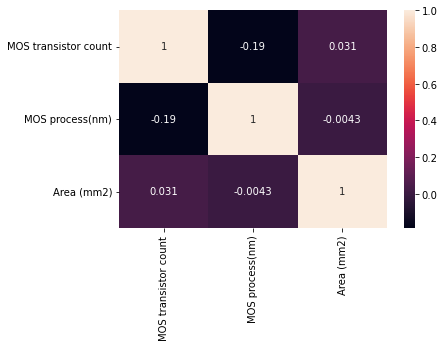

In [30]:
sns.heatmap(df2.corr(), annot=True)

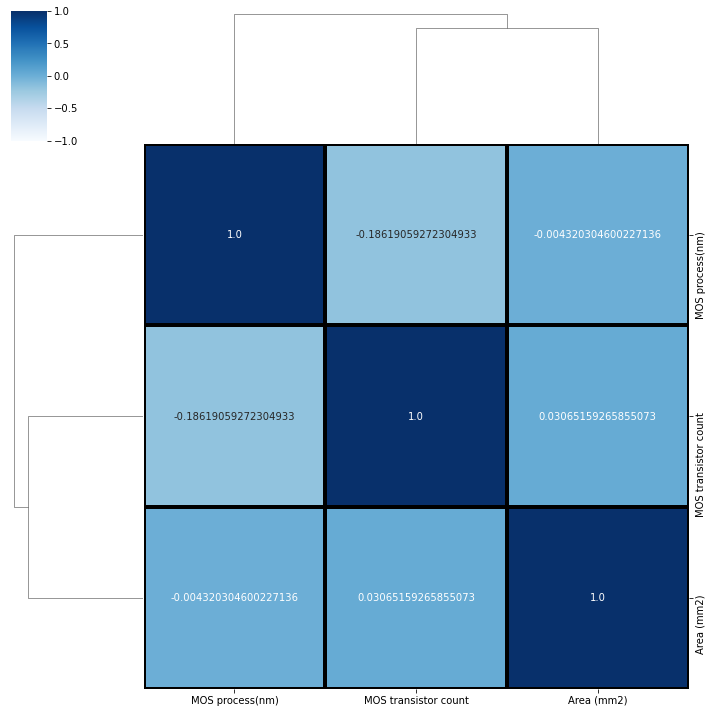

In [31]:
sns.clustermap(df2.corr(), annot=True, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=-1, vmax=1)

In [32]:
df3 = df2.copy()
df3 = df3.groupby(by=['Date ofintroduction'])['MOS transistor count'].max()
df3 = pd.DataFrame(df3)
df3

,MOS transistor count
Date ofintroduction,
1971,2250
1972,3500
1973,11000
1974,8000
1975,4528
1976,8500
1978,29000
1979,68000
1981,11500


In [33]:
df3.reset_index(inplace=True)
df3['differences'] = 0
df3['pct_change'] = 0
df3['isDouble'] = False
for i in range(len(df3)):
    if i > 1:
        df3.loc[i, 'differences'] = np.abs(df3.loc[i, 'MOS transistor count'] - df3.loc[i-2, 'MOS transistor count'])
        df3.loc[i, 'pct_change'] = df3.loc[i, 'differences'] / df3.loc[i-2, 'MOS transistor count']
        if df3.loc[i, 'pct_change'] >= 1:
            df3.loc[i, 'isDouble'] = True

In [34]:
df3

,Date ofintroduction,MOS transistor count,differences,pct_change,isDouble
0,1971,2250,0,0.000000,False
1,1972,3500,0,0.000000,False
2,1973,11000,8750,3.888889,True
3,1974,8000,4500,1.285714,True
4,1975,4528,6472,0.588364,False
5,1976,8500,500,0.062500,False
6,1978,29000,24472,5.404594,True
7,1979,68000,59500,7.000000,True
8,1981,11500,17500,0.603448,False
9,1982,134000,66000,0.970588,False


In [35]:
def moving_average(df, n): 
    df['rolling_mean_pct_change'] = df['pct_change']
    df['rolling_mean_pct_change'] = df['rolling_mean_pct_change'].rolling(n).mean()
    df['rolling_transistor_count'] = df['MOS transistor count']
    df['rolling_transistor_count'] = df['MOS transistor count'].rolling(n).mean()
    return df

In [36]:
df4 = df3.copy()
df4['mean_pct_change'] = (np.mean(df4['pct_change'])+1)
df4['mean_transistor_count'] = np.mean(df4['MOS transistor count'])
df4 = moving_average(df4, 9)
df4

,Date ofintroduction,MOS transistor count,differences,pct_change,isDouble,mean_pct_change,mean_transistor_count,rolling_mean_pct_change,rolling_transistor_count
0,1971,2250,0,0.000000,False,2.771697,3.762556e+09,NaN,NaN
1,1972,3500,0,0.000000,False,2.771697,3.762556e+09,NaN,NaN
2,1973,11000,8750,3.888889,True,2.771697,3.762556e+09,NaN,NaN
3,1974,8000,4500,1.285714,True,2.771697,3.762556e+09,NaN,NaN
4,1975,4528,6472,0.588364,False,2.771697,3.762556e+09,NaN,NaN
5,1976,8500,500,0.062500,False,2.771697,3.762556e+09,NaN,NaN
6,1978,29000,24472,5.404594,True,2.771697,3.762556e+09,NaN,NaN
7,1979,68000,59500,7.000000,True,2.771697,3.762556e+09,NaN,NaN
8,1981,11500,17500,0.603448,False,2.771697,3.762556e+09,2.092612,1.625311e+04
9,1982,134000,66000,0.970588,False,2.771697,3.762556e+09,2.200455,3.089200e+04


In [37]:
from sklearn.preprocessing import MinMaxScaler
df5 = df4.copy()
scaler = MinMaxScaler(feature_range=(0.01, 1))
df5[["scaled_count"]] = scaler.fit_transform(df5[["rolling_transistor_count"]])
df5[["scaled_pct"]] = scaler.fit_transform(df5[["rolling_mean_pct_change"]])
df5

,Date ofintroduction,MOS transistor count,differences,pct_change,isDouble,mean_pct_change,mean_transistor_count,rolling_mean_pct_change,rolling_transistor_count,scaled_count,scaled_pct
0,1971,2250,0,0.000000,False,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
1,1972,3500,0,0.000000,False,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
2,1973,11000,8750,3.888889,True,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
3,1974,8000,4500,1.285714,True,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
4,1975,4528,6472,0.588364,False,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
5,1976,8500,500,0.062500,False,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
6,1978,29000,24472,5.404594,True,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
7,1979,68000,59500,7.000000,True,2.771697,3.762556e+09,NaN,NaN,NaN,NaN
8,1981,11500,17500,0.603448,False,2.771697,3.762556e+09,2.092612,1.625311e+04,0.010000,0.565585
9,1982,134000,66000,0.970588,False,2.771697,3.762556e+09,2.200455,3.089200e+04,0.010001,0.605781


In [38]:
df5.columns

Index(['Date ofintroduction', 'MOS transistor count', 'differences',
       'pct_change', 'isDouble', 'mean_pct_change', 'mean_transistor_count',
       'rolling_mean_pct_change', 'rolling_transistor_count', 'scaled_count',
       'scaled_pct'],
      dtype='object')

In [39]:
dataset = df5.copy()
dataset = dataset.drop(['MOS transistor count', 'differences','pct_change', 
                         'isDouble', 'mean_pct_change', 'mean_transistor_count',
                         'rolling_mean_pct_change', 'rolling_transistor_count'],axis=1)
dataset.set_index('Date ofintroduction', inplace=True)
dataset

,scaled_count,scaled_pct
Date ofintroduction,,
1971,NaN,NaN
1972,NaN,NaN
1973,NaN,NaN
1974,NaN,NaN
1975,NaN,NaN
1976,NaN,NaN
1978,NaN,NaN
1979,NaN,NaN
1981,0.010000,0.565585


In [40]:
dataset.iplot('surface')

In [41]:
dataset.reset_index(inplace=True)

In [42]:
dataset.iplot(kind='scatter3d', 
          x='Date ofintroduction', 
          y='scaled_count',
          z='scaled_pct')

In [43]:
dataset2 = dataset.copy()
dataset2 = dataset2.dropna()
dataset2

,Date ofintroduction,scaled_count,scaled_pct
8,1981,0.010000,0.565585
9,1982,0.010001,0.605781
10,1983,0.010001,0.643593
11,1984,0.010002,0.499848
12,1985,0.010004,0.922855
13,1986,0.010004,0.934017
14,1987,0.010005,0.931730
15,1988,0.010006,0.942584
16,1989,0.010013,0.790316
17,1990,0.010020,1.000000


In [44]:
dataset2.reset_index(inplace=True, drop=True)
dataset2

,Date ofintroduction,scaled_count,scaled_pct
0,1981,0.010000,0.565585
1,1982,0.010001,0.605781
2,1983,0.010001,0.643593
3,1984,0.010002,0.499848
4,1985,0.010004,0.922855
5,1986,0.010004,0.934017
6,1987,0.010005,0.931730
7,1988,0.010006,0.942584
8,1989,0.010013,0.790316
9,1990,0.010020,1.000000


In [45]:
dataset2.iplot(kind='bubble', 
          x='Date ofintroduction', 
          y='scaled_pct',
          size='scaled_count')

In [46]:
dataset2.iplot(kind='bubble', 
          x='Date ofintroduction', 
          y='scaled_count',
          size='scaled_pct')

In [47]:
dataset2.iplot(kind='bubble', 
          x='Date ofintroduction', 
          y='scaled_count',
          size='scaled_pct',
          colorscale="rdylbu")

In [48]:
df4

,Date ofintroduction,MOS transistor count,differences,pct_change,isDouble,mean_pct_change,mean_transistor_count,rolling_mean_pct_change,rolling_transistor_count
0,1971,2250,0,0.000000,False,2.771697,3.762556e+09,NaN,NaN
1,1972,3500,0,0.000000,False,2.771697,3.762556e+09,NaN,NaN
2,1973,11000,8750,3.888889,True,2.771697,3.762556e+09,NaN,NaN
3,1974,8000,4500,1.285714,True,2.771697,3.762556e+09,NaN,NaN
4,1975,4528,6472,0.588364,False,2.771697,3.762556e+09,NaN,NaN
5,1976,8500,500,0.062500,False,2.771697,3.762556e+09,NaN,NaN
6,1978,29000,24472,5.404594,True,2.771697,3.762556e+09,NaN,NaN
7,1979,68000,59500,7.000000,True,2.771697,3.762556e+09,NaN,NaN
8,1981,11500,17500,0.603448,False,2.771697,3.762556e+09,2.092612,1.625311e+04
9,1982,134000,66000,0.970588,False,2.771697,3.762556e+09,2.200455,3.089200e+04


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df4 = df4.dropna()
X = df4.drop('isDouble', axis=1)
X = pd.get_dummies(X)
y = df4['isDouble']
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.18)

In [50]:
model.score(X_test, y_test)

0.75

In [51]:
y_pred1 = model.predict(X)

In [52]:
model.predict_proba(X_train), model.predict_proba(X_test)

(array([[5.48974262e-01, 4.51025738e-01],
        [0.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [9.45543580e-01, 5.44564201e-02],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.89555144e-11],
        [4.71320303e-02, 9.52867970e-01],
        [0.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [0.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [8.19870630e-01, 1.80129370e-01],
        [7.96397012e-01, 2.03602988e-01],
        [9.42527998e-01, 5.74720015e-02],
        [7.24241625e-02, 9.27575838e-01],
        [9.99955942e-01, 4.4058461

In [53]:
cfm = confusion_matrix(y, y_pred1)

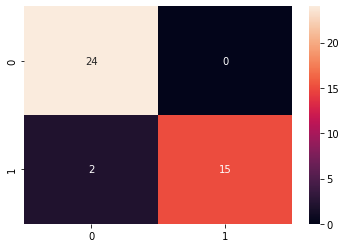

In [54]:
sns.heatmap(cfm, annot=True);

In [55]:
scores = precision_recall_fscore_support(y, y_pred1, average='macro'), accuracy_score(y, y_pred1)
scores = np.asarray(scores).reshape(2,)
scores

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



array([(0.9615384615384616, 0.9411764705882353, 0.94875, None),
       0.9512195121951219], dtype=object)

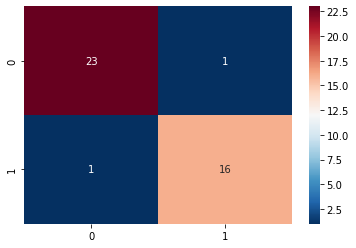

In [56]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X,y)
y_pred = logreg.predict(X)
cf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='RdBu_r');

<AxesSubplot:>

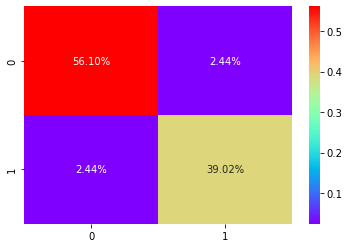

In [57]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='rainbow')

<AxesSubplot:>

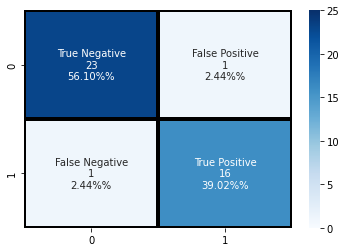

In [58]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'{value:0.0f}' for value in
                cf_matrix.flatten()]
group_percentages = [f'{value:.2%}%' for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', linewidths=4,
    linecolor='black',cmap='Blues', vmin=0, vmax=25)

In [59]:
precision_recall_fscore_support(y, y_pred, average='macro'), accuracy_score(y, y_pred)

((0.9497549019607843, 0.9497549019607843, 0.9497549019607843, None),
 0.9512195121951219)

# The number of transistors in a dense integrated circuit (IC) more than doubles about every two years
---
* The average count of transistors increased from 2250 to 57000000000, which is a 2,533,333,333% increase over 50 years.
* The mean percentage change every 2 years since 1971 was 277%.
---
##### Hence, Moore's law cannot be rejected